<a href="https://colab.research.google.com/github/Shoreef/Monitoring-Physical-Acitvity-for-social-prescribing-/blob/main/Testing_on_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing YOLOV8

In [2]:
!pip install ultralytics>=8.0.81

In [3]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=b7085fa2daec3c980548f0a8858997a007895be6b787609cdf1634a688dcca1e
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


# Testing the installation

In [8]:
import numpy as np
from ultralytics import YOLO
import cv2
import cvzone
import math
import time
from keras.models import load_model
import random


# Load YOLOv8 model (pose estimation)
model = YOLO('yolov8l-pose.pt')  # Ensure you have the correct model file

# Load the image
image_path = '/content/drive/MyDrive/physical_activity/test_dataset/sta.jpg.jpg'
image = cv2.imread(image_path)

# Run YOLOv8 pose estimation
results = model(image)

# Extract the pose information
for result in results:
  boxes = result.boxes
  print(boxes)

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 48.6ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 41.2ms
Speed: 2.3ms preprocess, 44.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.9206, 0.9192, 0.9174, 0.8430], device='cuda:0')
data: tensor([[2.2200e+02, 4.0600e+02, 3.4500e+02, 8.6100e+02, 9.2058e-01, 0.0000e+00],
        [6.6800e+02, 3.9200e+02, 8.1000e+02, 8.8100e+02, 9.1925e-01, 0.0000e+00],
        [4.9000e+01, 3.9800e+02, 2.4600e+02, 9.0500e+02, 9.1736e-01, 0.0000e+00],
        [0.0000e+00, 3.9300e+02, 8.0000e+01, 1.0760e+03, 8.4301e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.S

In [ ]:
for result in results:
  boxes = result.boxes
  for box in boxes:
    print(box)
    break
  break

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9206])
data: tensor([[222.0000, 406.0000, 345.0000, 861.0000,   0.9206,   0.0000]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([1, 6])
xywh: tensor([[283.5000, 633.5000, 123.0000, 455.0000]])
xywhn: tensor([[0.3500, 0.5866, 0.1519, 0.4213]])
xyxy: tensor([[222., 406., 345., 861.]])
xyxyn: tensor([[0.2741, 0.3759, 0.4259, 0.7972]])


In [ ]:
print(result.boxes)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.9198, 0.8983], device='cuda:0')
data: tensor([[1.2100e+02, 1.9800e+02, 1.0980e+03, 7.1000e+02, 9.1983e-01, 0.0000e+00],
        [7.4400e+02, 4.2000e+01, 1.1460e+03, 7.0900e+02, 8.9828e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[609.5000, 454.0000, 977.0000, 512.0000],
        [945.0000, 375.5000, 402.0000, 667.0000]], device='cuda:0')
xywhn: tensor([[0.4762, 0.6306, 0.7633, 0.7111],
        [0.7383, 0.5215, 0.3141, 0.9264]], device='cuda:0')
xyxy: tensor([[ 121.,  198., 1098.,  710.],
        [ 744.,   42., 1146.,  709.]], device='cuda:0')
xyxyn: tensor([[0.0945, 0.2750, 0.8578, 0.9861],
        [0.5813, 0.0583, 0.8953, 0.9847]], device='cuda:0')


In [ ]:
print(result.keypoints)

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9490, 0.6121, 0.9651, 0.0758, 0.9684, 0.9795, 0.9463, 0.8405, 0.5915, 0.6643, 0.4598, 0.1818, 0.0942, 0.0086, 0.0050, 0.0017, 0.0011],
        [0.9728, 0.9172, 0.9689, 0.4789, 0.8960, 0.9376, 0.9419, 0.4559, 0.5008, 0.1854, 0.2169, 0.1630, 0.1725, 0.0280, 0.0286, 0.0140, 0.0130]], device='cuda:0')
data: tensor([[[6.4831e+02, 3.5389e+02, 9.4900e-01],
         [6.4940e+02, 3.2704e+02, 6.1213e-01],
         [6.2455e+02, 3.2583e+02, 9.6509e-01],
         [0.0000e+00, 0.0000e+00, 7.5760e-02],
         [5.2837e+02, 3.2129e+02, 9.6839e-01],
         [6.3083e+02, 4.1752e+02, 9.7950e-01],
         [3.1955e+02, 4.0618e+02, 9.4632e-01],
         [7.7812e+02, 4.9183e+02, 8.4050e-01],
         [2.1475e+02, 6.3150e+02, 5.9153e-01],
         [9.5326e+02, 4.5534e+02, 6.6432e-01],
         [0.0000e+00, 0.0000e+00, 4.5980e-01],
         [0.0000e+00, 0.0000e+00, 1.8182e-01],
         [0.0000e+00, 0.0000e+00, 9.4161e-02],
     

# Keypoint Visualization

100%|██████████| 6.52M/6.52M [00:00<00:00, 23.7MB/s]



0: 448x640 9 persons, 53.5ms
Speed: 2.0ms preprocess, 53.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


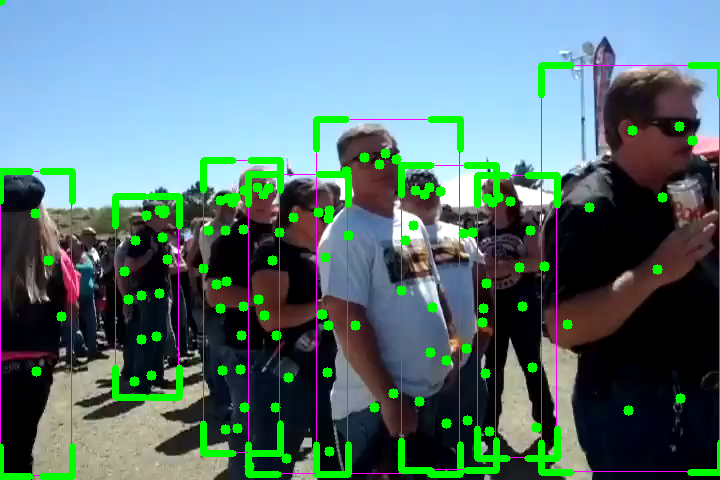

In [10]:
import numpy as np
from ultralytics import YOLO
import cv2
import cvzone
import math
import time
from google.colab.patches import cv2_imshow


# Load YOLOv8 model (pose estimation)
model = YOLO('yolov8n-pose.pt')  # Ensure you have the correct model file

# Load the image
image_path = '/content/drive/MyDrive/physical_activity/test_dataset/standing/stand(5).jpg'
image = cv2.imread(image_path)

# Run YOLOv8 pose estimation
results = model(image)

# Extract the pose information
for result in results:
  boxes = result.boxes
  keypoints=result.keypoints
  for box in boxes:
    conf=box.conf
    if conf>=0.5:
      for keypoint in keypoints:
        for pt in keypoint.xy[0]:
          x,y=pt
          cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)

      x1,y1,x2,y2 = box.xyxy[0]
      x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
      w,h = x2-x1,y2-y1
      cvzone.cornerRect(image,(x1,y1,w,h))

cv2_imshow(image)


# Data Normalization

In [5]:
def norm_kpts(lm_list, torso_size_multiplier=2.5):
    max_distance = 0
    center_x = (lm_list[12][0] +       # right_hip
                lm_list[11][0])*0.5    # left_hip
    center_y = (lm_list[12][1] +       # right_hip
                lm_list[11][1])*0.5    # left_hip

    shoulders_x = (lm_list[6][0] +       # right_shoulder
                    lm_list[5][0])*0.5   # left_shoulder
    shoulders_y = (lm_list[6][1] +       # right_shoulder
                    lm_list[5][1])*0.5   # left_shoulder

    for lm in lm_list:
        distance = math.sqrt(
            (lm[0] - center_x)**2 + (lm[1] - center_y)**2)
        if(distance > max_distance):
            max_distance = distance
    torso_size = math.sqrt(
        (shoulders_x - center_x)**2 + (shoulders_y - center_y)**2)
    max_distance = max(
        torso_size*torso_size_multiplier, max_distance)
    if max_distance==0:
      max_distance=1

    pre_lm = list(np.array(
        [[(landmark[0]-center_x)/max_distance, (landmark[1]-center_y)/max_distance] for landmark in lm_list]
    ).flatten())

    return pre_lm

# Predection

In [6]:
import pandas as pd
col_names = [
    '0_X', '0_Y', '1_X', '1_Y', '2_X', '2_Y', '3_X', '3_Y', '4_X', '4_Y', '5_X', '5_Y',
    '6_X', '6_Y', '7_X', '7_Y', '8_X', '8_Y', '9_X', '9_Y', '10_X', '10_Y', '11_X', '11_Y',
    '12_X', '12_Y', '13_X', '13_Y', '14_X', '14_Y', '15_X', '15_Y', '16_X', '16_Y'
]
class_names=["Pushup_down","Pushup_up","Sitting","Standing","Walking"]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


predicted Pose Class:  Walking
predicted Pose Class:  Walking
predicted Pose Class:  Walking
predicted Pose Class:  Walking
predicted Pose Class:  Walking


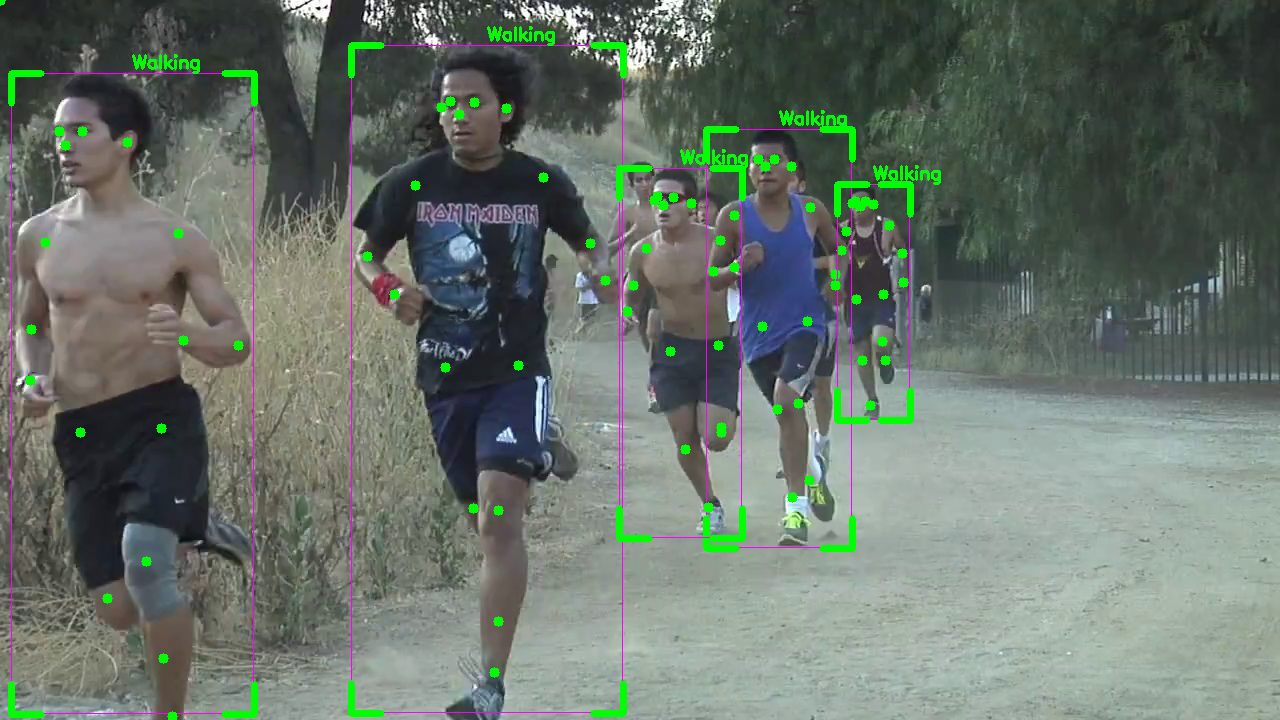

In [15]:
from re import VERBOSE
image_path = '/content/drive/MyDrive/physical_activity/test_dataset/walking/walking(4).jpg'
image = cv2.imread(image_path)

# Run YOLOv8 pose estimation
predict_model = load_model('/content/drive/MyDrive/physical_activity/86%.h5')
model = YOLO('yolov8l-pose.pt')
results = model(image, verbose=False)
for result in results:
  keypoints=result.keypoints
  boxes=result.boxes
  for j in range (len(boxes)):
    conf=boxes[j].conf
    if conf>=0.5:
      lm_list=[]
      box=boxes[j]
      x1,y1,x2,y2 = box.xyxy[0]
      x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
      w,h = x2-x1,y2-y1
      cvzone.cornerRect(image,(x1,y1,w,h))
      keypoint=keypoints[j]


      for pt in keypoint.xy[0]:
        x,y=pt
        cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)
        lm_list.append([int(x), int(y)])
        if len(lm_list) == 17:

          pre_lm = norm_kpts(lm_list)
          data = pd.DataFrame([pre_lm], columns=col_names)
          predict = predict_model.predict(data,verbose=0)[0]

          if max(predict) > 0.5:
              pose_class = class_names[predict.argmax()]
              # print('predictions: ', predict)
              print('predicted Pose Class: ', pose_class)
          else:
              pose_class = 'Unknown Pose'
              print('[INFO] Predictions is below given Confidence!!')

          text_x = x1 + (w // 2)
          text_y = y1 - 5  # Adjust as needed
          cv2.putText(image, pose_class, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)



cv2_imshow(image)

# Enhance Visualization by ploting box and skeleton

In [26]:
def generate_color(index):
    colors = [
        (255, 0, 0),    # Red
        (0, 255, 0),    # Green
        (128, 0, 128),  # Purple
        (0, 0, 255),    # Blue
        (255, 255, 0),  # Cyan
        (0, 255, 255),  # Yellow
        (255, 0, 255),  # Magenta
        (128, 0, 0),    # Maroon
        (0, 128, 0),    # Dark Green
        (0, 0, 128),    # Navy
        (128, 128, 0),  # Olive
        (0, 128, 128),  # Teal
        (0, 0, 0),      # Black

    ]
    return colors[index % len(colors)]

In [16]:
def draw_box(w,h,x1,y1, image, pose_class, color):
  font_scale = w / 200
  (text_width, text_height), _ = cv2.getTextSize(pose_class, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 2)
  # Position the text above the bounding box
  text_x = x1
  text_y = y1 - 5
  # Ensure the text doesn't go out of the image bounds
  if text_y - text_height < 0:
      text_y = y1 + h + text_height + 10
  # Draw the text
  cv2.rectangle(image, (text_x, text_y - text_height - 10), (text_x + text_width, text_y), color, -1)
  # Draw the text inside the filled rectangle
  cv2.putText(image, pose_class, (text_x, text_y - 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), 2)
  cvzone.cornerRect(image,(x1,y1,w,h),colorR=color,colorC=color)
  return image


In [17]:
def plot_skeleton_kpts(im, kpts, radius=5, shape=(640, 640), confi=0.5, line_thick=1):
    pose_palette = np.array([[255, 128, 0], [255, 153, 51], [255, 178, 102], [230, 230, 0], [255, 153, 255],
                            [153, 204, 255], [255, 102, 255], [255, 51, 255], [102, 178, 255], [51, 153, 255],
                            [255, 153, 153], [255, 102, 102], [255, 51, 51], [153, 255, 153], [102, 255, 102],
                            [51, 255, 51], [0, 255, 0], [0, 0, 255], [255, 0, 0], [255, 255, 255]],
                            dtype=np.uint8)
    skeleton = [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9],
                [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]

    limb_color = pose_palette[[9, 9, 9, 9, 7, 7, 7, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 16, 16]]
    kpt_color = pose_palette[[16, 16, 16, 16, 16, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9]]

    for i, k in enumerate(kpts):
        color_k = [int(x) for x in kpt_color[i]]
        x_coord, y_coord = k[0], k[1]
        cv2.circle(im, (int(x_coord), int(y_coord)), radius, color_k, -1, lineType=cv2.LINE_AA)

    for i, sk in enumerate(skeleton):
        pos1 = (kpts[(sk[0] - 1)][0]), (kpts[(sk[0] - 1)][1])
        pos2 = (kpts[(sk[1] - 1)][0]), (kpts[(sk[1] - 1)][1])

        if pos1[0] % shape[1] == 0 or pos1[1] % shape[0] == 0 or pos1[0] < 0 or pos1[1] < 0:
            continue
        if pos2[0] % shape[1] == 0 or pos2[1] % shape[0] == 0 or pos2[0] < 0 or pos2[1] < 0:
            continue
        cv2.line(im, pos1, pos2, [int(x) for x in limb_color[i]], thickness=line_thick, lineType=cv2.LINE_AA)

# Testing the model on videos without class duration

In [19]:
def pose_estimination(predict_model,model,image):
  results = model(image,verbose=False)
  for result in results:
    keypoints=result.keypoints
    boxes=result.boxes
    for j in range (len(boxes)):
      conf=boxes[j].conf
      if conf>=0.5:
        lm_list=[]
        box=boxes[j]
        x1,y1,x2,y2 = box.xyxy[0]
        x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
        w,h = x2-x1,y2-y1
        color = generate_color(j)
        keypoint=keypoints[j]


        for i, pt in enumerate(keypoint.xy[0]):
          x,y=pt

          lm_list.append([int(x), int(y)])
          if len(lm_list) == 17:
            pre_lm = norm_kpts(lm_list)
            data = pd.DataFrame([pre_lm], columns=col_names)
            predict = predict_model.predict(data,verbose=0)[0]

            if max(predict) > 0.5:
                pose_class = class_names[predict.argmax()]
                value= int(max(predict)*100)
                pose_class=(pose_class +' '+str(value)+'%')
                print('predicted Pose Class: ', pose_class)
                image=draw_box(w,h,x1,y1, image, pose_class,color)
                plot_skeleton_kpts(image, lm_list, radius=3, line_thick=1, confi=0.5)




  return image

In [ ]:
video_path = '/content/drive/MyDrive/physical_activity/vid1.mp4'
cap = cv2.VideoCapture(video_path)

# Get the frame rate of the input video
fps = cap.get(cv2.CAP_PROP_FPS)

# Load the models
predict_model = load_model('/content/drive/MyDrive/physical_activity/86%.h5')
model = YOLO('yolov8l-pose.pt')

# Define the codec and create VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/drive/MyDrive/physical_activity/test_with_skeleton2.mp4', fourcc, fps, (int(cap.get(3)), int(cap.get(4))))


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 pose estimation
    frame=pose_estimination(predict_model,model,frame)

    # Write the frame with predictions
    out.write(frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()

# Testing the model on videos with class duration

In [22]:
import cv2

def overlay_class_durations(image, class_durations):

    for i, (class_name, duration) in enumerate(class_durations.items()):
        # Overlay text on the image
        cv2.putText(image, f"{class_name}: {duration:.2f}s",
                    (10, 30 + i * 30),  # x and y coordinates
                    cv2.FONT_HERSHEY_SIMPLEX,  # Font type
                    1,  # Font scale
                    (255, 255, 255),  # Font color (white)
                    2,  # Font thickness
                    cv2.LINE_AA)  # Line type

    return image


In [23]:
def pose_estimination2(predict_model, model, image, class_durations, frame_time):
    results = model(image,verbose=False)
    for result in results:
        keypoints = result.keypoints
        boxes = result.boxes
        for j in range(len(boxes)):
            conf = boxes[j].conf
            if conf >= 0.5:
                lm_list = []
                box = boxes[j]
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                color = generate_color(j)
                keypoint = keypoints[j]

                for i, pt in enumerate(keypoint.xy[0]):
                    x, y = pt
                    lm_list.append([int(x), int(y)])
                    if len(lm_list) == 17:
                        pre_lm = norm_kpts(lm_list)
                        data = pd.DataFrame([pre_lm], columns=col_names)
                        predict = predict_model.predict(data,verbose=0)[0]

                        if max(predict) > 0.5:
                            pose_class = class_names[predict.argmax()]
                            value = int(max(predict) * 100)
                            pose_class2 =pose_class
                            pose_class = (pose_class + ' ' + str(value) + '%')

                            #print('predicted Pose Class: ', pose_class)
                            image = draw_box(w, h, x1, y1, image, pose_class, color)
                            plot_skeleton_kpts(image, lm_list, radius=3, line_thick=1, confi=0.5)

                            # Update the duration of the predicted class
                            class_durations[pose_class2] += frame_time

    image = overlay_class_durations(image, class_durations)

    return image, class_durations


In [28]:
class_durations = {class_name: 0 for class_name in class_names}
video_path = '/content/drive/MyDrive/physical_activity/12.mp4'
cap = cv2.VideoCapture(video_path)

# Get the frame rate of the input video
fps = cap.get(cv2.CAP_PROP_FPS)

frame_time = 1 / fps

cap = cv2.VideoCapture(video_path)

# Get the frame rate of the input video
fps = cap.get(cv2.CAP_PROP_FPS)

# Load the models
predict_model = load_model('/content/drive/MyDrive/physical_activity/86%.h5')
model = YOLO('yolov8l-pose.pt')

# Define the codec and create VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/drive/MyDrive/physical_activity/duration2.mp4', fourcc, fps, (int(cap.get(3)), int(cap.get(4))))


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 pose estimation
    frame,class_durations=pose_estimination2(predict_model,model,frame,class_durations, frame_time)

    # Write the frame with predictions
    out.write(frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
#out.release()
cv2.destroyAllWindows()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Calculating Energy Expenditure

In [110]:
import cv2

def overlay_energy_expenditure(image, class_durations,energy_expenditure):

    for i, (class_name, duration) in enumerate(class_durations.items()):
        # Overlay text on the image
        cv2.putText(image, f"{class_name}: {duration:.2f}s",
                    (10, 30 + i * 30),  # x and y coordinates
                    cv2.FONT_HERSHEY_SIMPLEX,  # Font type
                    1,  # Font scale
                    (255, 255, 255),  # Font color (white)
                    2,  # Font thickness
                    cv2.LINE_AA)  # Line typ
    for i, (class_name, energy) in enumerate(energy_expenditure.items()):
    # Overlay text on the image
        cv2.putText(image, f"Burned Callories: {energy:.2f}kCal",
                    (400, 30 + i * 30),  # x and y coordinates
                    cv2.FONT_HERSHEY_SIMPLEX,  # Font type
                    1,  # Font scale
                    (255, 255, 255),  # Font color (white)
                    2,  # Font thickness
                    cv2.LINE_AA)  # Line type

    return image


In [105]:
def energy_expenditure_cal(class_durations,pose_class):
  energy_expenditure=0
  user_weight_kg=70
  pup_met=3.8
  sit_met=1
  walk_met=2.5
  stand_met=2.5
  if pose_class=='Pushup_down' or pose_class=='Pushup_up':
    energy_expenditure= (0.0175*pup_met*user_weight_kg)
    energy_expenditure=energy_expenditure*((class_durations['Pushup_down']+ class_durations['Pushup_up'])/60)
  elif pose_class=='Sitting':
    energy_expenditure=(0.0175*sit_met*user_weight_kg)
    energy_expenditure=energy_expenditure*(class_durations[pose_class]/60)
  elif pose_class=='Walking':
    energy_expenditure=(0.0175*walk_met*user_weight_kg)
    energy_expenditure=energy_expenditure*(class_durations[pose_class]/60)
  elif pose_class=='Standing':
    energy_expenditure=(0.0175*stand_met*user_weight_kg)
    energy_expenditure=energy_expenditure*(class_durations[pose_class]/60)
  return energy_expenditure

In [108]:
def pose_estimination3(predict_model, model, image, class_durations, frame_time,energy_expenditure):
    results = model(image,verbose=False)
    for result in results:
        keypoints = result.keypoints
        boxes = result.boxes
        for j in range(len(boxes)):
            conf = boxes[j].conf
            if conf >= 0.5:
                lm_list = []
                box = boxes[j]
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                color = generate_color(j)
                keypoint = keypoints[j]

                for i, pt in enumerate(keypoint.xy[0]):
                    x, y = pt
                    lm_list.append([int(x), int(y)])
                    if len(lm_list) == 17:
                        pre_lm = norm_kpts(lm_list)
                        data = pd.DataFrame([pre_lm], columns=col_names)
                        predict = predict_model.predict(data,verbose=0)[0]

                        if max(predict) > 0.5:
                            pose_class = class_names[predict.argmax()]
                            value = int(max(predict) * 100)
                            pose_class2 =pose_class
                            pose_class = (pose_class + ' ' + str(value) + '%')

                            #print('predicted Pose Class: ', pose_class)
                            image = draw_box(w, h, x1, y1, image, pose_class, color)
                            plot_skeleton_kpts(image, lm_list, radius=3, line_thick=1, confi=0.5)

                            # Update the duration of the predicted class
                            class_durations[pose_class2] += frame_time
                            energy=energy_expenditure_cal(class_durations,pose_class2)
                            if pose_class2=='Pushup_down' or pose_class2=='Pushup_up':
                              energy_expenditure['Pushup_down'] = energy
                              energy_expenditure['Pushup_up'] = energy
                            else:
                              energy_expenditure[pose_class2] = energy



    image = overlay_energy_expenditure(image, class_durations,energy_expenditure)

    return image, class_durations


In [48]:
class_durations

{'Pushup_down': 13.430349824561345,
 'Pushup_up': 11.39426180451125,
 'Sitting': 1.1746661654135337,
 'Standing': 0,
 'Walking': 0.03915553884711779}

In [65]:
energy=energy_expenditure(class_durations,'Walking')

In [66]:
energy

0.001998563961988304

In [113]:
energy_expenditure = {class_name: 0 for class_name in class_names}
class_durations = {class_name: 0 for class_name in class_names}
video_path = '/content/drive/MyDrive/physical_activity/vid1.mp4'
cap = cv2.VideoCapture(video_path)

# Get the frame rate of the input video
fps = cap.get(cv2.CAP_PROP_FPS)

frame_time = 1 / fps

cap = cv2.VideoCapture(video_path)

# Get the frame rate of the input video
fps = cap.get(cv2.CAP_PROP_FPS)

# Load the models
predict_model = load_model('/content/drive/MyDrive/physical_activity/86%.h5')
model = YOLO('yolov8l-pose.pt')

# Define the codec and create VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/drive/MyDrive/physical_activity/duration5.mp4', fourcc, fps, (int(cap.get(3)), int(cap.get(4))))


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 pose estimation
    frame,class_durations=pose_estimination3(predict_model,model,frame,class_durations, frame_time,energy_expenditure)

    # Write the frame with predictions
    out.write(frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
#out.release()
cv2.destroyAllWindows()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
